In [1]:
import pandas as pd
import numpy as np
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [2]:
df_data = pd.read_excel('mlr02.xls')
bp = df_data.iloc[:,0].values
age = df_data.iloc[:,1].values
weight = df_data.iloc[:,2].values

*** No CODEPAGE record, no encoding_override: will use 'ascii'


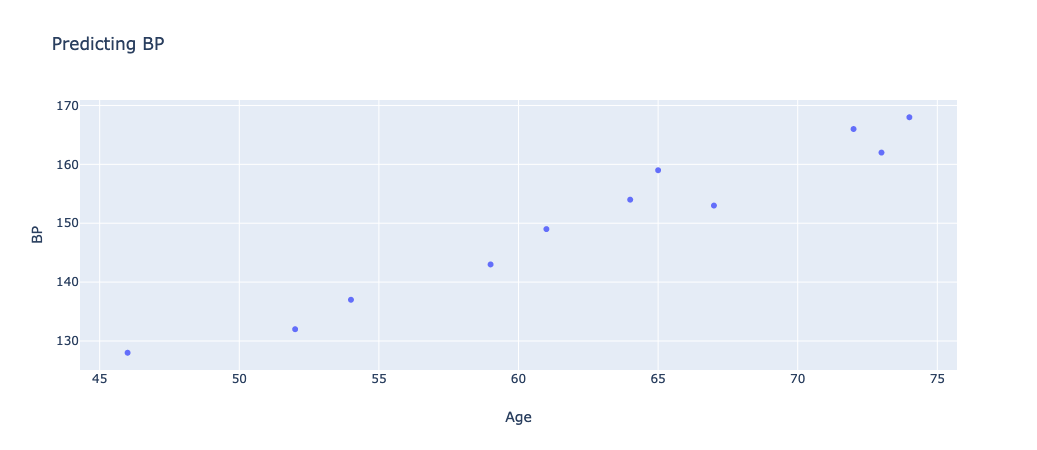

In [3]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=age,y=bp,mode ='markers'))
fig.update_layout(
    title=go.layout.Title(
        text="Predicting BP"
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Age"
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="BP"
        )
    )
)
fig.show()

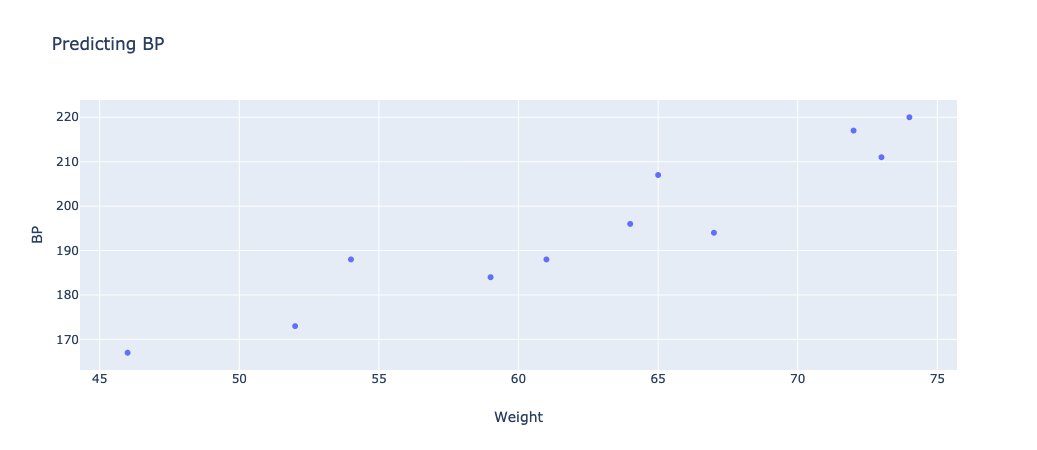

In [4]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=age,y=weight,mode ='markers'))
fig.update_layout(
    title=go.layout.Title(
        text="Predicting BP"
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Weight"
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="BP"
        )
    )
)
fig.show()

In [5]:
df_data['ones'] = 1
display(df_data.head())


def get_r_squared(X,y):
    w = np.linalg.solve(np.matmul(X.T,X),np.matmul(X.T,y))
    y_hat = np.matmul(X,w)
    SS_res = np.sum((y - y_hat)**2)
    SS_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - SS_res/SS_tot
    return r_squared
Y = df_data.X1.values
X = df_data.loc[:,['X2','ones']].values

print ('R squared using age {}'.format(get_r_squared(X,Y)))
Y = df_data.X1.values
X = df_data.loc[:,['X3','ones']].values
print ('R squared using weight {}'.format(get_r_squared(X,Y)))

Y = df_data.X1.values
X = df_data.loc[:,['X2','X3','ones']].values
print ('R squared using age and weight {}'.format(get_r_squared(X,Y)))

,X1,X2,X3,ones
0,132,52,173,1
1,143,59,184,1
2,153,67,194,1
3,162,73,211,1
4,154,64,196,1


R squared using age 0.9578407208147355
R squared using weight 0.9419952085293065
R squared using age and weight 0.976847104150209
